# Lab 4: Point Pattern Analysis

#### In this lab, you will practise to use influential statistical methods to analyze point patterns. 

#### Specifically, the following methods will be used.

- Mean Center
- Standard Distance
- Standard Deviational Ellipse

Before the lab, please download the data from [here](https://drive.google.com/file/d/1iVWhi6SsyziSrpFcNwSKKt_fbi9myJls/view?usp=sharing). Extract the data into a folder in your computer

Load packages needed for this lab

In [4]:
import pointpats as ppt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt

#set default plotting size
plt.rcParams['figure.figsize'] = [10, 8]

Read the dataset of airbnb listings into a pandas dataframe object.

Remember to change the file path to where your data is stored.

In [5]:
df = pd.read_csv("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab4_data/airbnb.csv")

No need to run this block

In [6]:
#18.730885, -156.481344  20.477662, -154.563512
# df2=df[(df['longitude']>-156.481344)&(df['longitude']<-154.563512)&(df['latitude']>18.730885)&(df['latitude']<20.477662)]

# from pyproj import Proj

# myProj =  Proj("+proj=utm +zone=4Q, +north +ellps=GRS80 +datum=NAD83 +units=m +no_defs")
# x, y = myProj(list(df2['longitude']), list(df2['latitude']))
# df2['x']=x
# df2['y']=y
# df2.to_csv("C:/Users/yi/Documents/UH_work/Teaching/GEOG389/labs/lab4_data/airbnb.csv")

Preview the columns of df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 24 columns):
Unnamed: 0          5108 non-null int64
id                  5108 non-null int64
host_name           5108 non-null object
host_since          5108 non-null object
latitude            5108 non-null float64
longitude           5108 non-null float64
room_type           5108 non-null object
bathrooms           5104 non-null float64
bedrooms            5106 non-null float64
beds                5106 non-null float64
price               5108 non-null int64
weekly_price        659 non-null object
monthly_price       520 non-null object
security_deposit    3708 non-null object
cleaning_fee        4669 non-null object
guests_included     5108 non-null int64
extra_people        5108 non-null object
has_availability    5108 non-null object
availability_30     5108 non-null int64
availability_60     5108 non-null int64
availability_90     5108 non-null int64
availability_365    5108 non-null in

Preview the first 5 rows

In [8]:
df.head()

,Unnamed: 0,id,host_name,host_since,latitude,longitude,room_type,bathrooms,bedrooms,beds,...,cleaning_fee,guests_included,extra_people,has_availability,availability_30,availability_60,availability_90,availability_365,x,y
0,0,15648,Kelly,4/9/2009,19.459439,-155.882444,Entire home/apt,1.0,1.0,1.0,...,$95.00,2,$45.00,t,0,0,0,236,827337.914383,2.154633e+06
1,1,39898,Kelly,4/9/2009,19.461308,-155.881116,Entire home/apt,1.0,1.0,1.0,...,$95.00,2,$45.00,t,2,2,2,277,827473.690713,2.154843e+06
2,3,202338,Ira,8/18/2011,19.435018,-155.223581,Entire home/apt,1.0,1.0,1.0,...,NaN,2,$20.00,t,15,27,48,315,896648.497958,2.153316e+06
3,4,205804,Kelly,4/9/2009,19.459061,-155.881781,Entire home/apt,1.0,1.0,1.0,...,$95.00,1,$10.00,t,0,1,1,250,827408.374108,2.154593e+06
4,5,250414,Charles And Corrina,10/19/2011,19.517786,-155.920875,Private room,1.5,1.0,1.0,...,$60.00,2,$10.00,t,23,53,82,351,823183.642750,2.161024e+06


Get the x and y columns, and store them in `df2`. (Why we don't use lat/lng?)

In [9]:
df2 = df[['x','y']]

Convert df2 into a PointPattern Object

In [10]:
bnbpp = ppt.PointPattern(df2)

Plot the points.

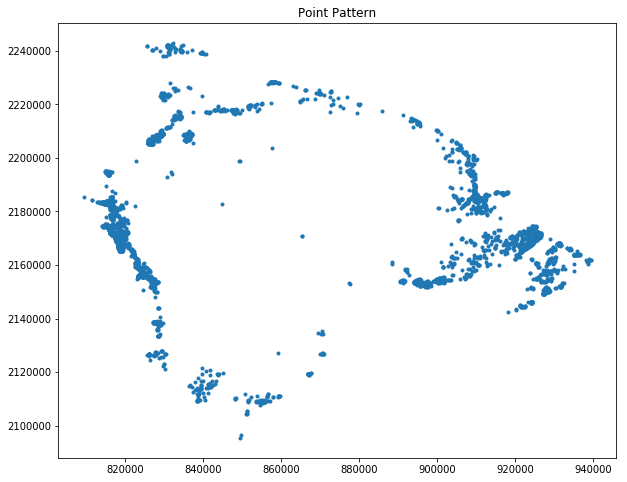

In [11]:
bnbpp.plot()

Calculate the mean center of the points

![alt text](images/fig8.jpg)

In [12]:
mc = ppt.mean_center(bnbpp.points)
mc

array([ 851520.9320149, 2177179.0573344])

Calculate the standard distance.

![alt_text](images/fig9.jpg)

In [13]:
std_dist = ppt.std_distance(bnbpp.points)
std_dist

49015.23263443855

Plot the circle of standard distance

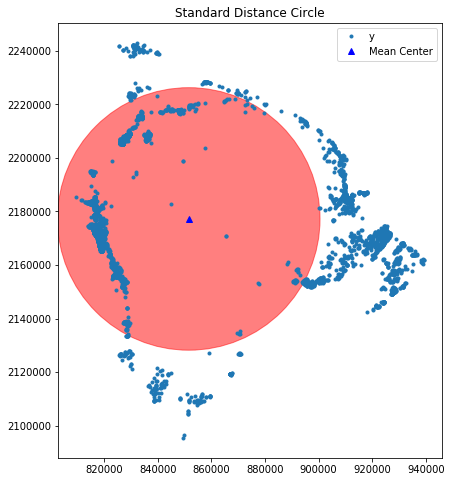

In [14]:
# create a circle using the mean center as the center and standard distance as the radius
circle=Circle((mc[0], mc[1]),std_dist,color='r',alpha = 0.5)

# Plot the points with a title
ax = bnbpp.plot(get_ax=True, title='Standard Distance Circle')

# add the circle to the plot
ax.add_artist(circle)

# add mean center to the plot
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')

# set the scales equal
ax.set_aspect('equal')

# add legend
plt.legend()

Create the standard deviational ellipse of the points

These three numbers are the long axis, short axis and rotation angle of the ellipse

The angle is rotation in DEGREES (anti-clockwise)


In [15]:
elps = ppt.ellipse(bnbpp.points)
elps

(33364.25149211034, 59117.593801981886, -1.4301686378691594)

In [16]:
#Create an ellipse objects using the parameters of the ellipse
e = Ellipse(xy=mc, width=elps[0]*2, height=elps[1]*2,
            angle=-np.degrees(elps[2]), alpha=0.5, facecolor='r',edgecolor='b')

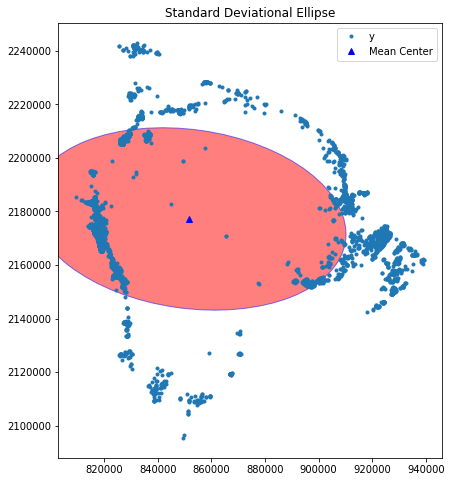

In [17]:
# plott the points of airbnb and add a title
ax = bnbpp.plot(get_ax = True ,title = "Standard Deviational Ellipse")

# add the ellipse to the plot
ax.add_artist(e)

# set the scales of the x and y axis equal
ax.set_aspect('equal')

# plot the mean center
plt.plot(ppt.mean_center(bnbpp.points)[0], ppt.mean_center(bnbpp.points)[1], 'b^', label='Mean Center')

# add legend
plt.legend(numpoints=1)

## Setting up geodataframe for plotting different categories of airbnb points

Print the three types of properties

In [18]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Split the entire dataset to three subsets of different property types

In [19]:
df_entire_home = df[df['room_type']=="Entire home/apt"]
df_shared_room = df[df['room_type']=="Shared room"]
df_private_room = df[df['room_type']=="Private room"]

Convert the subsets of the dataframes into three PointPattern objects

In [20]:
pp_eh = ppt.PointPattern(df_entire_home[['x','y']])
pp_sr = ppt.PointPattern(df_shared_room[['x','y']])
pp_pr = ppt.PointPattern(df_private_room[['x','y']])

Calculate the mean centers of the three point sets

In [21]:
mc_eh = ppt.mean_center(pp_eh.points)
mc_sr = ppt.mean_center(pp_sr.points)
mc_pr = ppt.mean_center(pp_pr.points)

Calculate the standard distances of the three point sets

In [22]:
sd_eh = ppt.std_distance(pp_eh.points)
sd_sr = ppt.std_distance(pp_sr.points)
sd_pr = ppt.std_distance(pp_pr.points)

Plot for mean center and standard distance of the three types of properties

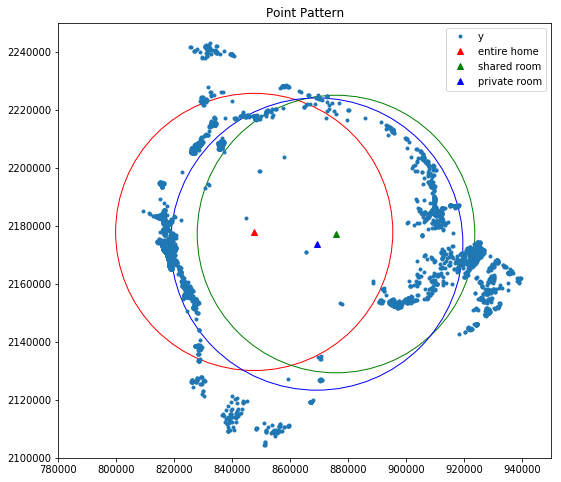

In [23]:
# Create the standard distance circles for the three property types
cir_eh=Circle((mc_eh[0], mc_eh[1]), sd_eh, edgecolor='r', facecolor='none')
cir_sr=Circle((mc_sr[0], mc_sr[1]), sd_sr, edgecolor='g', facecolor='none')
cir_pr=Circle((mc_pr[0], mc_pr[1]), sd_pr, edgecolor='b', facecolor='none')

# plot points of all airbnb locations
ax1 = bnbpp.plot(get_ax=True)

# plot the standard distance circles of the three property types
ax1.add_artist(cir_eh)
ax1.add_artist(cir_sr)
ax1.add_artist(cir_pr)

# plot the mean center of the three property types
plt.plot(mc_eh[0],mc_eh[1], 'r^', label='entire home')
plt.plot(mc_sr[0],mc_sr[1], 'g^', label='shared room')
plt.plot(mc_pr[0],mc_pr[1], 'b^', label='private room')

# add legend
plt.legend(numpoints=1)

# set the scale of x, y axes equal
ax1.set_aspect('equal')

# increase the plotting extent
plt.axis([780000,950000,2100000,2250000])

plt.show()

([<matplotlib.axis.XTick at 0x20668da0780>,
 <a list of 3 Text xticklabel objects>)

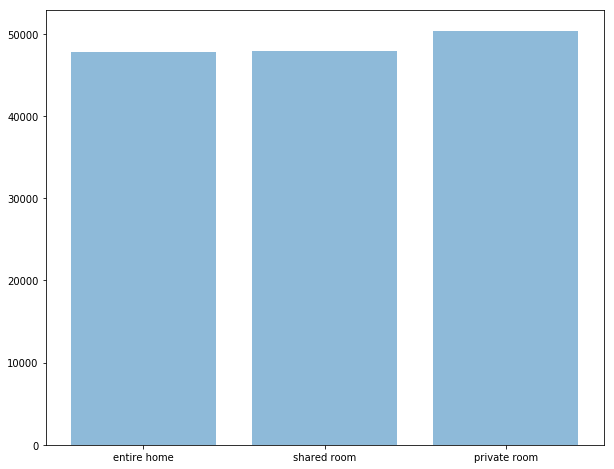

In [24]:
plt.bar([1,2,3], [sd_eh,sd_sr,sd_pr], align='center', alpha=0.5)
plt.xticks([1,2,3], ['entire home','shared room','private room'])

---

**Answer the following questions and submit your answers to Laulima by March 7th (Thursday)**

# Question 1

Please refer to the above instruction and create standard deviational ellipses for the three property types.

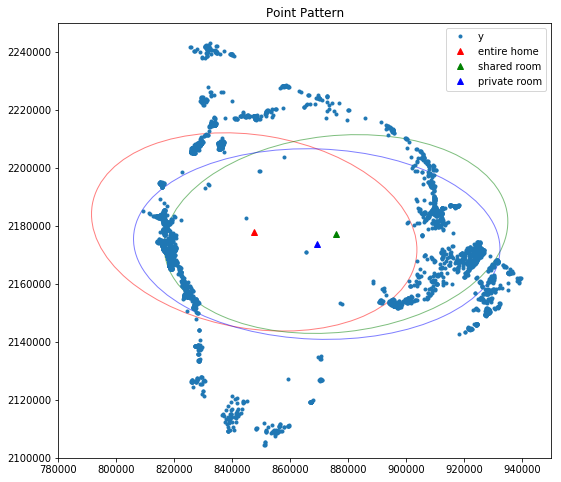

In [25]:
# calculate major/minor-axis and angle of the ellipses of the three types of properties
elps_eh = ppt.ellipse(pp_eh.points)
elps_sr = ppt.ellipse(pp_sr.points)
elps_pr = ppt.ellipse(pp_pr.points)

# Create eclipse according to the major/minor axes and rotation angle
e_eh = Ellipse(xy=mc_eh, width=elps_eh[0]*2, height=elps_eh[1]*2, 
            angle=-np.degrees(elps_eh[2]), alpha=0.5, facecolor='none',edgecolor='r')

e_sr = Ellipse(xy=mc_sr, width=elps_sr[0]*2, height=elps_sr[1]*2, 
            angle=-np.degrees(elps_sr[2]), alpha=0.5, facecolor='none',edgecolor='g')

e_pr = Ellipse(xy=mc_pr, width=elps_pr[0]*2, height=elps_pr[1]*2, 
            angle=-np.degrees(elps_pr[2]), alpha=0.5, facecolor='none',edgecolor='b')

# plot points of all airbnb locations
ax1 = bnbpp.plot(get_ax=True)

# plot the standard distance circles of the three property types
ax1.add_artist(e_eh)
ax1.add_artist(e_sr)
ax1.add_artist(e_pr)

# plot the mean center of the three property types
plt.plot(mc_eh[0],mc_eh[1], 'r^', label='entire home')
plt.plot(mc_sr[0],mc_sr[1], 'g^', label='shared room')
plt.plot(mc_pr[0],mc_pr[1], 'b^', label='private room')

# add legend
plt.legend(numpoints=1)

# set the scale of x, y axes equal
ax1.set_aspect('equal')

# increase the plotting extent
plt.axis([780000,950000,2100000,2250000])

plt.show()


Text(0.5, 1.0, 'The major axes of the ellipses')

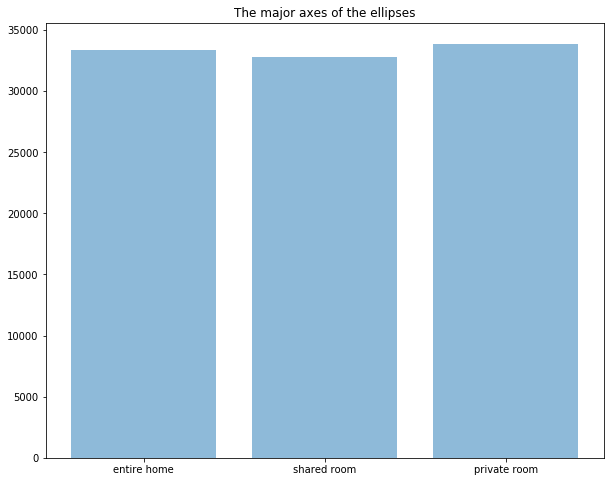

In [27]:
# Histogram of the minor axes of the ellipse
plt.bar([1,2,3], [elps_eh[0],elps_pr[0],elps_sr[0]], align='center', alpha=0.5)
plt.xticks([1,2,3], ['entire home','shared room','private room'])
plt.title('The minor axes of the ellipses')

Text(0.5, 1.0, 'The major axes of the ellipses')

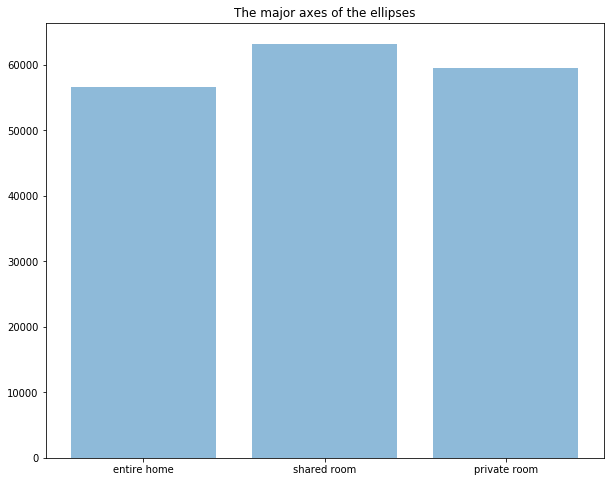

In [32]:
# Histogram of the major axes of the ellipse
plt.bar([1,2,3], [elps_eh[1],elps_pr[1],elps_sr[1]], align='center', alpha=0.5)
plt.xticks([1,2,3], ['entire home','shared room','private room'])
plt.title('The major axes of the ellipses')

# Question 2

Please interpret the spatial distribution of airbnb according to the output in Question 1.

Note: the size of the ellipses may be similar and hard to compare visually in the map. You can plot the major and minor axies of the ellipses in a bar chart to compare.

# Answer to Question 2

For your reference:

The mean centers indicate the centers of the distributions of the three types of airbnb. For example, the mean center of the entire rooms is more to the west compared to the other two types, indicating more entire rooms are located in the west coast (near Kona) compared to the east (Hilo side).

Ideally, the two axes (major and minor axes) of the ellipses need to be compared deparately, by creating two histograms. The lengths of the major axes indicate the dispersion of the points along the orientation of the major axes. Same for the minor axes. 

The rotation angles of the ellipses indicate the orientations of the point distribution. In this dataset, the ellipse of the entire homes tends to be northwest - southeast oriented. This orientation indicates that more entire homes are located in the northwest (north to Kona) and southeast (Puna) which stretch the ellipse to that direction. In comparison, the shared rooms and private rooms tend to located along the east-west axis (Kona and Hilo).